In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure 
import matplotlib
import json

In [7]:
df_reviews = pd.read_csv('./df_reviews.csv', index_col=0)

In [8]:
p = df_reviews.groupby('overall')['overall'].agg(['count'])
# Item count
prod_count = df_reviews['asin'].nunique()
# User count
user_count = df_reviews['reviewerID'].nunique()
# Rating count
rating_count = df_reviews['overall'].count()

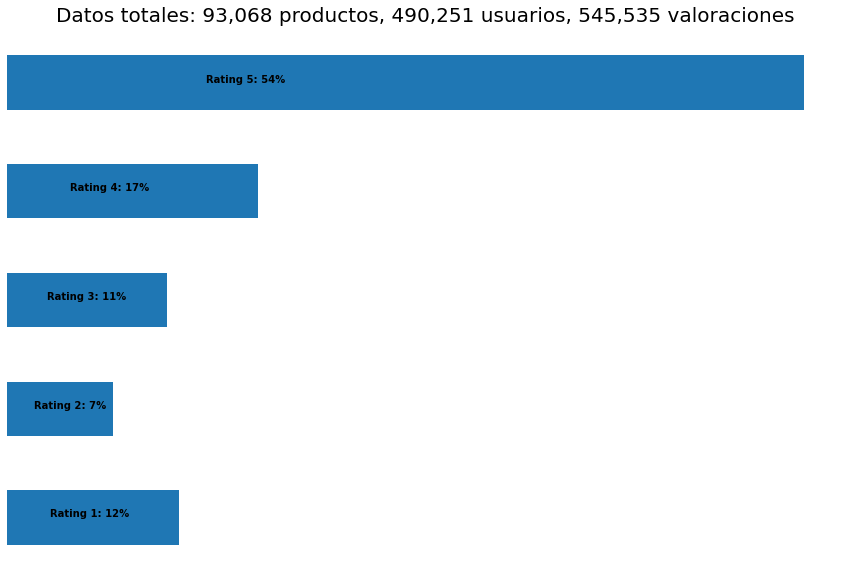

In [13]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Datos totales: {:,} productos, {:,} usuarios, {:,} valoraciones'.format(prod_count, user_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'black', weight = 'bold')

In [14]:
import seaborn as sns
sns.set_color_codes()
sns.set(style="whitegrid")
%matplotlib inline

C:\Users\pmato\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pmato\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


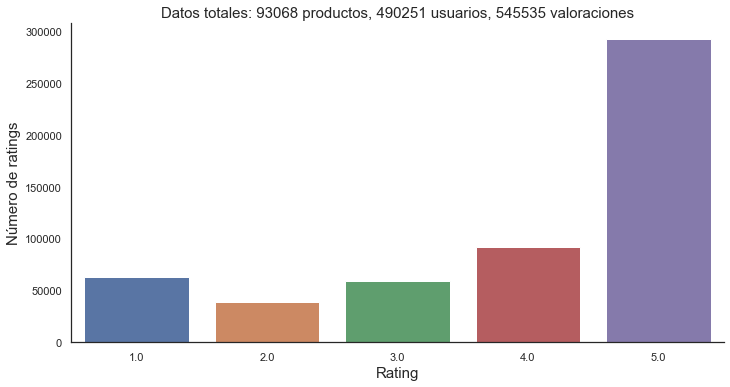

In [37]:
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=df_reviews, aspect=2.0, kind='count')
    plt.title('Datos totales: {:} productos, {:} usuarios, {:} valoraciones'.format(prod_count, user_count, rating_count), fontsize=15)
    plt.ylabel("Número de ratings",fontsize=15)
    plt.xlabel("Rating", fontsize=15)

plt.savefig('datatotal.pdf', bbox_inches='tight')

In [4]:
df_metadata = pd.read_csv("./data/Z_nodup_aux.csv", index_col=0)

In [5]:
df_metadata

,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
62316,Thank God I'm An Atheist T-Shirt,Better Than Pants,NaN,"20,970,908inClothing,ShoesJewelry(",5 star,B00OCCG9GQ,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76497,Doinshop Rhinestone 8 LOVE Heart Anchor Bracel...,NaN,NaN,"2,070,524inClothing,ShoesJewelry(",5 star,B00T72PLK6,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154705,KIMIO Women Lady Brand Date Day Clock Full Ste...,KIMIO,NaN,"22,055,542inClothing,ShoesJewelry(",3791,B01CSBF64I,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62287,QIYUN.Z Colorful Wide Resin New Fashion Style ...,NaN,['Package Dimensions:\n \n9...,"1,108,134inClothing,ShoesJewelry(",W005N1790,B00OCA59LY,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11812,The Original Mad Dogger Gangsta Locs Sunglasse...,Locs,['Product Dimensions:\n \n6...,"3,946,130inClothing,ShoesJewelry(",5 star5 star (0%),B005P1KD3S,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29161,Ecosusi Antique Beaded Sequin Turquoise Sunbur...,Ecosusi.Inc,['Product Dimensions:\n \n8...,"21,420,563inClothing,ShoesJewelry(",5 star,B00EVNP764,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,['Product Description:Glam up any party dress ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172384,JeHouze Women Candy Color Bow Fashion Handbag ...,JeHouze,['Package Dimensions:\n \n1...,"13,055,337inClothing,ShoesJewelry(",5 star5 star (0%),B01F9JVW4Y,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38223,Lady Crossover V Neck Long Sleeve Knitted Pepl...,uxcell,NaN,"13,761,735inClothing,ShoesJewelry(",5 star5 star (0%),B00I8JHOEU,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18940,Angry Birds Boy's Hooded Wrap Blanket - One Size,Little Jammies,['Package Dimensions:\n \n1...,"6,629,940inClothing,ShoesJewelry(",5 star,B00AAGJGBI,['https://images-na.ssl-images-amazon.com/imag...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
